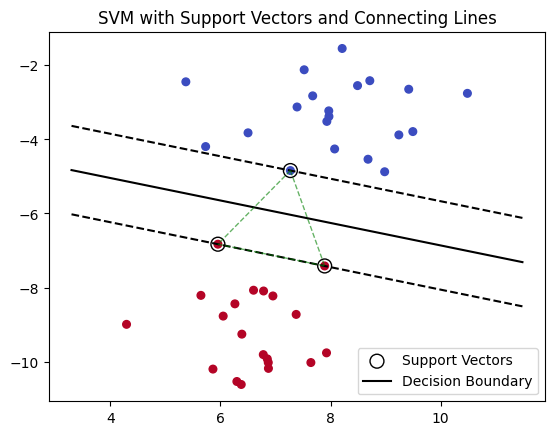

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Create toy dataset
X, y = datasets.make_blobs(n_samples=40, centers=2, random_state=6)

# Fit SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)

# Plot support vectors
sv = clf.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
yy = -(w[0] * xx + b) / w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 🧵 Plot lines between support vectors
from itertools import combinations
for (x1, x2) in combinations(sv, 2):
    plt.plot([x1[0], x2[0]], [x1[1], x2[1]], 'g--', linewidth=1, alpha=0.6)

plt.legend()
plt.title("SVM with Support Vectors and Connecting Lines")
plt.show()

# Examples Present in SCIKIT

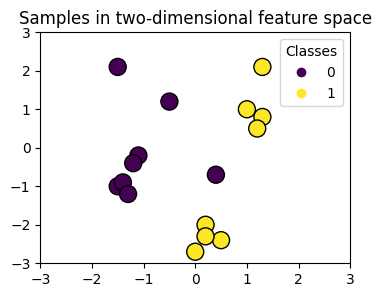

In [2]:
#Creating a datset

import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="blue",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes") 
    #The * is used to unpack a tuple of (handles, labels) into separate arguments when calling ax.legend().
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

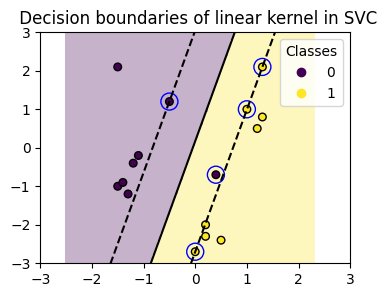

In [3]:
plot_training_data_with_decision_boundary("linear")

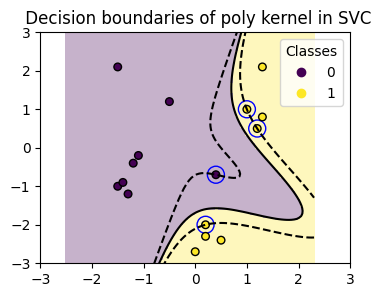

In [4]:
plot_training_data_with_decision_boundary("poly")

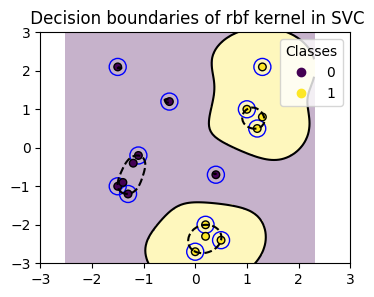

In [5]:
plot_training_data_with_decision_boundary("rbf")

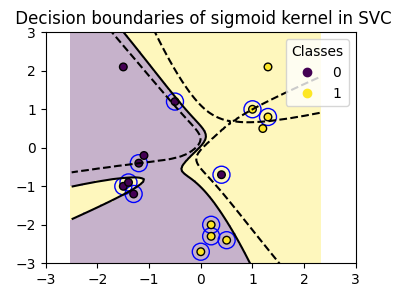

In [6]:
plot_training_data_with_decision_boundary("sigmoid")